<a href="https://colab.research.google.com/github/asadnazir14/Topical-_Chatbot/blob/main/Topical_Chatbot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!wget https://enriched-topical-chat.s3.amazonaws.com/train.json

!wget https://enriched-topical-chat.s3.amazonaws.com/valid_freq.json

!wget https://enriched-topical-chat.s3.amazonaws.com/valid_rare.json

!wget https://enriched-topical-chat.s3.amazonaws.com/test_freq.json

!wget https://enriched-topical-chat.s3.amazonaws.com/test_rare.json

!pip install transformers

!pip install spacy
!python -m spacy download en_core_web_sm

!pip install keras-tuner

--2023-09-16 17:05:14--  https://enriched-topical-chat.s3.amazonaws.com/train.json
Resolving enriched-topical-chat.s3.amazonaws.com (enriched-topical-chat.s3.amazonaws.com)... 52.92.163.73, 52.92.240.129, 52.92.179.217, ...
Connecting to enriched-topical-chat.s3.amazonaws.com (enriched-topical-chat.s3.amazonaws.com)|52.92.163.73|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 92343363 (88M) [application/json]
Saving to: ‘train.json’

train.json          100%[===================>]  88.07M  26.8MB/s    in 3.3s    

2023-09-16 17:05:18 (26.8 MB/s) - ‘train.json’ saved [92343363/92343363]

--2023-09-16 17:05:18--  https://enriched-topical-chat.s3.amazonaws.com/valid_freq.json
Resolving enriched-topical-chat.s3.amazonaws.com (enriched-topical-chat.s3.amazonaws.com)... 52.92.163.73, 52.92.240.129, 52.92.179.217, ...
Connecting to enriched-topical-chat.s3.amazonaws.com (enriched-topical-chat.s3.amazonaws.com)|52.92.163.73|:443... connected.
HTTP request sent, awaitin

In [ ]:
import pandas as pd
import json

# Load the JSON data
with open('/content/train.json', 'r') as file:
    data = json.load(file)

# Convert the JSON data to a pandas DataFrame
df = pd.DataFrame.from_dict(data, orient='index')

# Print the first few rows of the DataFrame
print(df)

import json

# Load the JSON data
with open('/content/train.json', 'r') as file:
    data = json.load(file)

# Print the keys at the top level of the JSON data
print(data.keys())

import pandas as pd
import json
import spacy

# Load the JSON data
with open('/content/train.json', 'r') as file:
    data = json.load(file)

                                       config  \
t_bde29ce2-4153-4056-9eb7-f4ad710505fe      C   
t_1abc9c37-387d-4013-8691-88ef8c010e58      B   
t_1a600621-5ad4-409c-a812-bc0b2bb03aa6      C   
t_01269680-99c3-4ab4-9df3-23901e0623c9      C   
t_c4f84350-a9e8-4928-bde8-5193b62388e0      B   
...                                       ...   
t_56ef264f-af34-42ff-ac54-0f8d5a47e8b4      B   
t_1a8383a5-2c8d-4687-b26e-3434b6d7fd91      B   
t_46a82c75-d203-49c5-9d9a-2e03085d829b      C   
t_e959a00e-5928-411f-9933-347edb6edf6b      A   
t_884c3d36-67da-41a1-b432-6aa8601d31f7      B   

                                                                                  content  \
t_bde29ce2-4153-4056-9eb7-f4ad710505fe  [{'message': ['Are you a fan of Google or Micr...   
t_1abc9c37-387d-4013-8691-88ef8c010e58  [{'message': ['do you like dance?'], 'agent': ...   
t_1a600621-5ad4-409c-a812-bc0b2bb03aa6  [{'message': ['Hey what's up do use Google ver...   
t_01269680-99c3-4ab4-9df3-23901e0623c9 

In [ ]:
# Create lists to store preprocessed and tokenized user and assistant texts
inputs = []
responses = []

# Define a spaCy tokenizer
nlp = spacy.load("en_core_web_sm")

# Preprocess and tokenize the text
def preprocess_and_tokenize(text):
    # Remove unnecessary whitespaces and lowercasing
    text = text.strip().lower()
    # Tokenize using spaCy
    tokens = [token.text for token in nlp(text)]
    return " ".join(tokens)

# Iterate through the keys and extract text data from the 'content' field
for key, value in data.items():
    content = value['content']
    # Extract user and assistant text from 'message' within 'content'
    user_text = content[0]['message'][0] if content else ""
    assistant_text = content[0]['message'][1] if len(content) > 0 and len(content[0]['message']) > 1 else ""

    # Preprocess and tokenize the text
    inputs.append(preprocess_and_tokenize(user_text))
    responses.append(preprocess_and_tokenize(assistant_text))

In [ ]:
# Create a DataFrame from the preprocessed data
df = pd.DataFrame({'user': inputs, 'assistant': responses})

# Now df contains preprocessed and tokenized user and assistant columns
print(df.head())

# Remove special characters and symbols
df['user'] = df['user'].str.replace(r'[^a-zA-Z0-9\s]', '')
df['assistant'] = df['assistant'].str.replace(r'[^a-zA-Z0-9\s]', '')

# Remove extra whitespaces
df['user'] = df['user'].str.strip()
df['assistant'] = df['assistant'].str.strip()

# Tokenization (using split() function)
df['user'] = df['user'].apply(lambda x: x.split())
df['assistant'] = df['assistant'].apply(lambda x: x.split())

                                                user               assistant
0             are you a fan of google or microsoft ?                        
1                                do you like dance ?                        
2  hey what 's up do use google very often?i real...                        
3                                               hi !  do you like to dance ?
4                                do you like dance ?                        


<ipython-input-17-ac5e2fc4ce31>:8: FutureWarning: The default value of regex will change from True to False in a future version.
  df['user'] = df['user'].str.replace(r'[^a-zA-Z0-9\s]', '')
<ipython-input-17-ac5e2fc4ce31>:9: FutureWarning: The default value of regex will change from True to False in a future version.
  df['assistant'] = df['assistant'].str.replace(r'[^a-zA-Z0-9\s]', '')


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Initialize a tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['user'] + df['assistant'])

# Convert text to sequences
df['user_sequences'] = tokenizer.texts_to_sequences(df['user'])
df['assistant_sequences'] = tokenizer.texts_to_sequences(df['assistant'])

# Pad sequences to the same length
max_seq_length = max(df['user_sequences'].apply(len).max(), df['assistant_sequences'].apply(len).max())
df['user_sequences'] = pad_sequences(df['user_sequences'], maxlen=max_seq_length, padding='post')
df['assistant_sequences'] = pad_sequences(df['assistant_sequences'], maxlen=max_seq_length, padding='post')

In [ ]:
from sklearn.model_selection import train_test_split

X = df['user_sequences']
y = df['assistant_sequences']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Define the model architecture
model = Sequential()

# Add an embedding layer to convert word indices to dense vectors
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_seq_length))

# Add the first LSTM layer for sequence processing
model.add(LSTM(256, return_sequences=True))  # Return sequences for the next LSTM layer

# Add the second LSTM layer
model.add(LSTM(256))

# Add an additional dense layer
model.add(Dense(128, activation='relu'))

# Add a dense layer for generating responses
model.add(Dense(len(tokenizer.word_index) + 1, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Define training parameters
batch_size = 32
epochs = 25

# One-hot encode the target sequences
y_train_one_hot = tf.keras.utils.to_categorical(y_train, num_classes=len(tokenizer.word_index) + 1)

# Train the model
history= model.fit(X_train, y_train_one_hot, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/25
173/173 [==============================] - 8s 44ms/step - loss: 1.5657 - accuracy: 0.6265 - val_loss: 1.8037 - val_accuracy: 0.6408
Epoch 2/25
173/173 [==============================] - 7s 38ms/step - loss: 1.5563 - accuracy: 0.6251 - val_loss: 1.8167 - val_accuracy: 0.6474
Epoch 3/25
173/173 [==============================] - 9s 50ms/step - loss: 1.5505 - accuracy: 0.6262 - val_loss: 1.8187 - val_accuracy: 0.6466
Epoch 4/25
173/173 [==============================] - 6s 38ms/step - loss: 1.5452 - accuracy: 0.6267 - val_loss: 1.8245 - val_accuracy: 0.6394
Epoch 5/25
173/173 [==============================] - 9s 50ms/step - loss: 1.5423 - accuracy: 0.6263 - val_loss: 1.8271 - val_accuracy: 0.6466
Epoch 6/25
173/173 [==============================] - 6s 37ms/step - loss: 1.5354 - accuracy: 0.6274 - val_loss: 1.8373 - val_accuracy: 0.6466
Epoch 7/25
173/173 [==============================] - 8s 44ms/step - loss: 1.5316 - accuracy: 0.6271 - val_loss: 1.8486 - val_accuracy: 0.6474

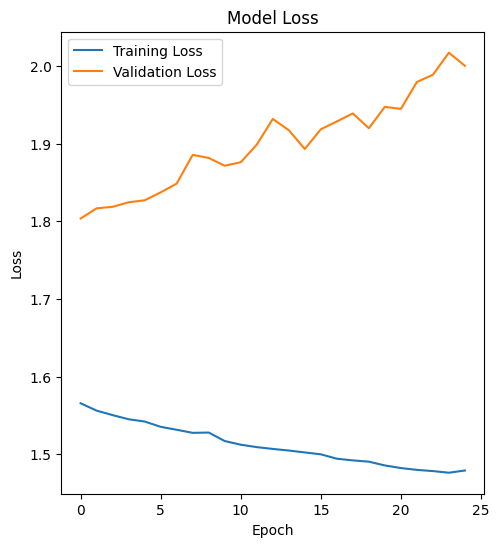

In [ ]:
# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()



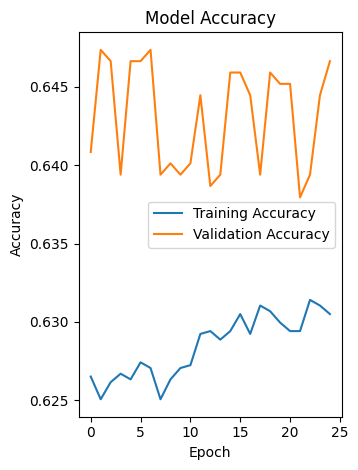

In [ ]:
# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()